# Sleep Patterns and Well-being

This report is to expore the Sleep Patterns and Well-being.

The whole dataset: HappyDB is a corpus of 100,000 crowd-sourced happy moments via Amazon’s Mechanical Turk. You can read more about it on https://megagon.ai/happydb-a-happiness-database-of-100000-happy-moments/. But I only use a subset of this dataset to conduct data analysis in this report.

### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as p
import pandas as pd
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.models import Word2Vec
import logging
from collections import Counter
import re

### Data preprocessing

In [3]:
folder = 'https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/'
cleaned_hm = pd.read_csv(folder+'cleaned_hm.csv', sep = ",",on_bad_lines='skip')

In [164]:
cleaned_hm.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection


In [5]:
cleaned_hm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100535 entries, 0 to 100534
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   hmid                   100535 non-null  int64 
 1   wid                    100535 non-null  int64 
 2   reflection_period      100535 non-null  object
 3   original_hm            100535 non-null  object
 4   cleaned_hm             100535 non-null  object
 5   modified               100535 non-null  bool  
 6   num_sentence           100535 non-null  int64 
 7   ground_truth_category  14125 non-null   object
 8   predicted_category     100535 non-null  object
dtypes: bool(1), int64(3), object(5)
memory usage: 6.2+ MB


### Data cleaning

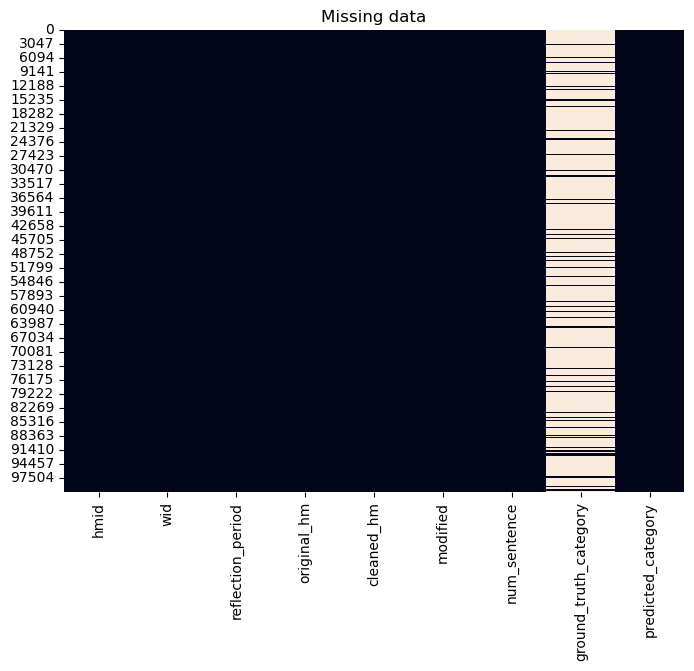

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cleaned_hm.isnull(), cbar=False)
plt.title('Missing data');

### Question 1: Does quality of sleep affect people's happiness?

Sleep, an indispensable physiological phenomenon, occupies nearly one-third of a human being's life. This significant portion underscores the profound impact that sleep quality has on our overall health and well-being. It is a crucial element in maintaining both physical and mental health, highlighting the vital role of sleep in every individual's life. After a day filled with activities and challenges, quality sleep becomes a sanctuary of rest and rejuvenation. But beyond mere rest, how does the quality of our sleep influence our happiness and sense of well-being? This question is not just academic, it resonates with the daily experiences of every person, reflecting a universal concern for health and happiness.

To explore this, I want to explore relationship between sleep and happiness. By extracting and analyzing mentions of 'sleep' in accounts of 'happy moments' I plan to investigate whether there is a direct correlation between the quality of sleep and the experience of happiness. This approach will enable me to understand if people often associate good sleep with their moments of happiness or if they explicitly mention sleep as a contributing factor to their experiences. By examining these narratives, I hope to gain insights into how sleep quality might be an underlying, often overlooked, determinant of happiness and contentment in our lives. So my first question is: Does quality of sleep affect people's happiness.

I try to answer this question by extra the key word "sleep" from “happy moments” to see if anyone metioned that their happy moment related with sleep.

In [174]:
# define the key word
word_to_search = 'sleep'

# search the rows cotains the key word "sleep" and create the new data frame
sleep_rows = cleaned_hm[cleaned_hm['cleaned_hm'].str.contains(word_to_search, case=False, na=False)]

#display the head of new data frame that contains the key word "sleep"
sleep_rows.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
95,27768,1028,24h,We know that sleep helps our bodies to recover...,We know that sleep helps our bodies to recover...,True,2,NaN,enjoy_the_moment
127,27800,455,24h,This is the second essay in a two-part series ...,This is the second essay in a two-part series ...,False,53,NaN,affection
141,27814,1827,24h,I am able to sleep longer than usual,I am able to sleep longer than usual,True,1,NaN,achievement
380,28053,5050,24h,I got some extra sleep last night.,I got some extra sleep last night.,True,1,NaN,leisure
580,28253,5050,24h,My cat snuggled against my leg while sleeping.,My cat snuggled against my leg while sleeping.,True,1,NaN,affection


In [167]:
# count the number of rows cotains the key word "sleep"
len(sleep_rows)

1204

<Axes: xlabel='num_sentence', ylabel='Count'>

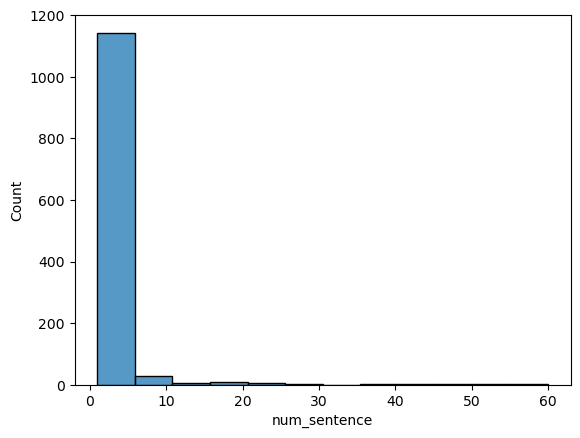

In [173]:
# plot number of sentence
sns.histplot(sleep_rows['num_sentence'])
plt.title('Number of sentence')

In my investigation into the connection between sleep and happiness, I extracted all instances where the word 'sleep' was mentioned in the context of happy memories. This analysis revealed a significant finding: out of the many accounts, 1,204 rows specifically included references to 'sleep' in their descriptions of happy moments. This substantial number underscores the impact that sleep quality appears to have on the quality of people's happiness. The frequency with which sleep emerges in these narratives suggests that it is not merely incidental but potentially a critical component of what people consider as contributing to their happiness. This observation has led me to a deeper understanding that the quality of sleep is not just a matter of physical health, but it intertwines significantly with our emotional well-being.

With this realization, I was curios about  the uncovering the specific nature of these happy memories associated with sleep. What are the common themes or underlying patterns that emerge among those who mention sleeping or resting in their happiest moments? Do these instances revolve around the sheer relief of rest after exhaustion, the joy of dreams, or the comfort of a peaceful night's sleep? Or perhaps, do they involve aspects of the environment, such as the tranquility of a particular place, the comfort of a bed, or the presence of a loved one? By exploring these common themes, I aim to gain a richer, more nuanced understanding of how sleep interplays with and enhances our experiences of joy and contentment. This exploration is not just about numbers and data; it's about the stories and experiences that paint a fuller picture of the human quest for happiness in relation to the often-overlooked, yet evidently crucial, role of sleep. In this case, my second question is: What are the common themes in happy moments for those who mention sleep or rest?

### Question 2: What are the common themes in happy moments for those who mention sleep?

To address this question, I have employed the Word2Vec model, a tool in natural language processing. Word2Vec is adept at understanding the context of a word within large sets of text data and can find words that are similar in context to 'sleep' in our dataset. This approach is not just about identifying synonyms or related terms. It's about uncovering deeper patterns and associations that might not be immediately obvious.

To enhance the effectiveness and relevance of the Word2Vec model, I defined a list of stop words. Stop words are commonly used words in any language that are often filtered out before processing natural language data because they carry little meaningful information about the content of the text. These include words such as 'the', 'is', and 'at', which appear frequently but don’t contribute much to the overall meaning. By removing these words, the model can focus more on the substantive content of the text. This refinement is essential to ensure that the analysis does not get cluttered with these high-frequency but low-information words, allowing for a more accurate and meaningful interpretation of the data. The goal is to create a Word2Vec model that can effectively distill how sleep related with people's happy experiences.

In [159]:
# define stop words
stop_word = ["got", "went", "made", "found", "a", "I", "had", "was", "took", "to", "met", "bought", "day",
             "the", "saw", "received", "watched", "finished", "finally", "am", "out", "have", "is", "spent",
             "that", "in", "at", "just", "and", "with", "of", "my", "ordered", "enjoyed", "give", "up", "last",
             "felt", "for", "an", "best", "best", "new", "happy", "some", "able", "did", "brought", "first", "few", 
             "attended", "we", "event", "gave", "started", "on", "came", "all", "favorate", "actually", "thing", "let",
             "woke", "asleep", "know", "used", "caught", "get", "i", "after", "this", "while", "without", "her", "when",
            "because", "little", "very", "he", "so", "back", "but", "as", "great", "down", "he", "go", "getting", "two",
            "before", "been", "today", "than", "which", "from", "me", "it", "time", "s", "good", "not", "where",
            "hour", "about", "she", "one", "t", "could", "hours", "our", "well", "by", "really", "feel", "be", "result",
            "can", "his", "then", "were", "more", "you", "him", "other", "are", "over", "many", "next", "long",
            "would", "being", "week", "through", "having", "they", "full", "feeling", "there", "important", "month",
            "do", "your", "life", "days", "most", "them", "yesterday", "how", "extra", "sleeping", "off", "any", "going",
            "into", "us", "even", "past", "8", "walking", "put", "or", "no", "didn't", "much", "every", "their", "see",
            "until", "like", "old", "has", "around", "lot", "each", "i'm", "me.", "since", "three", "take", "it"]

In [160]:
# logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# tokenize the sentences into words
tokenized_sentences = [sentence.lower().split() for sentence in sleep_rows['cleaned_hm']]

# train the Word2Vec model
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

def remove_word_from_model(model, stop_word):
    if stop_word in model.wv.key_to_index:
        
        # get stop word idex
        index = model.wv.key_to_index[stop_word]
        
        # remove the word from the vocabulary
        del model.wv.key_to_index[stop_word]
        del model.wv.index_to_key[index]
        
        # reduce the vectors
        model.wv.vectors = np.delete(model.wv.vectors, index, axis=0)
        
        # update the key_to_index dictionary
        model.wv.key_to_index = {word: (idx if idx < index else idx - 1) for word, idx in model.wv.key_to_index.items()}
        
        # if using negative sampling
        if hasattr(model.wv, 'syn1neg'):
            model.wv.syn1neg = np.delete(model.wv.syn1neg, index, axis=0)
        
        # if using hierarchical softmax
        if hasattr(model.wv, 'syn1'):
            model.wv.syn1 = np.delete(model.wv.syn1, index, axis=0)
        
        # decrement the count of the vocabulary
        model.corpus_count -= 1
        
        # invalidate the L2-normalized vectors
        model.wv.vectors_norm = None

# remove stop words from the model
for word in stop_word:
    remove_word_from_model(model, word)

word_to_search = 'sleep'

# vector for 'sleep'
vector = model.wv[word_to_search]

# similar words to 'sleep'
similar_words = model.wv.most_similar(word_to_search, topn = 10)

print(similar_words)


2024-01-30 20:06:39,295 : INFO : collecting all words and their counts
2024-01-30 20:06:39,295 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-01-30 20:06:39,303 : INFO : collected 4488 word types from a corpus of 38194 raw words and 1204 sentences
2024-01-30 20:06:39,304 : INFO : Creating a fresh vocabulary
2024-01-30 20:06:39,312 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 4488 unique words (100.00% of original 4488, drops 0)', 'datetime': '2024-01-30T20:06:39.311978', 'gensim': '4.3.0', 'python': '3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]', 'platform': 'macOS-13.1-arm64-arm-64bit', 'event': 'prepare_vocab'}
2024-01-30 20:06:39,312 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 38194 word corpus (100.00% of original 38194, drops 0)', 'datetime': '2024-01-30T20:06:39.312443', 'gensim': '4.3.0', 'python': '3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]', 'platform': 'macOS-13.1-arm64-

[('sleep.', 0.9994053244590759), ('bed', 0.9993438124656677), ('night', 0.9993126392364502), ('morning', 0.9992902278900146), ('work', 0.9992594718933105), ('early', 0.9992519617080688), ('home', 0.99909508228302), ('mother', 0.9990246891975403), ('husband', 0.999006986618042), ('bus', 0.9989525079727173)]


Utilizing the trained Word2Vec model, I extracted the top 10 words most closely associated with 'sleep' in our dataset. These words are 'bed', 'night', 'morning', 'work', 'early', 'home', 'mother', 'husband', and 'bus'. These particular words alongside 'sleep' in discussions of happy moments. It can be consider as the common topic for happy moment and sleep. These words paint a vivid picture of the contexts in which sleep intersects with happiness. For instance, 'bed' and 'night' may point to the comfortable sleep environments, 'morning' might relate to the feeling of refreshment upon waking, and 'work', 'early', and 'bus' could reflect the satisfaction of a well-rested start to a busy day. The mention of 'mother' and 'husband' hints at the role of close personal relationships in these happy sleep-related moments, emphasizing the social dimension of sleep.

To refine and validate these findings, I went a step further. I quantified the frequency of these words in narratives that mentioned sleep from our 'cleaned_hm' dataset. I used the smae stop word to filter the meaningless information. This step was crucial in determining not just the presence of these words, but their significance in the context of happy moments involving sleep. By counting how often each word appeared, I could discern which aspects of sleep were most commonly associated with happiness.

To make these results more accessible and interpretable, I visualized the data in both tabular and graphical formats. The table provides a clear, concise view of the word frequencies, offering an easy reference to understand the data at a glance. Complementing this, the bar chart offers a visual representation, highlighting the relative frequency of each word in a way that is immediate and impactful. This visualization not only aids in comprehending the data more intuitively but also helps in identifying patterns and trends at a glance. Through this approach of quantitative analysis and visual representation, it offer a comprehensive and clear understanding of how sleep is interect with people's experiences of happiness.

In [178]:
# tokenize and count words
word_counts = Counter()

for entry in sleep_rows['cleaned_hm']:
    
    # tokenize: split on non-alphabetic characters
    words = re.findall(r'\b\w+\b', entry.lower())
    
    # remove stop words and update counts
    filtered_words = [word for word in words if word not in stop_word]
    word_counts.update(filtered_words)

word_counts.most_common()[:11]


[('sleep', 936),
 ('night', 405),
 ('morning', 186),
 ('bed', 114),
 ('work', 105),
 ('fell', 87),
 ('early', 75),
 ('school', 72),
 ('home', 66),
 ('cat', 64),
 ('son', 49)]

In [180]:
# display the word frequency
freq_df = pd.DataFrame(word_counts.most_common(), columns=['Word', 'Frequency'])
freq_df = freq_df.sort_values(by='Frequency', ascending=False).head(11)
freq_df

,Word,Frequency
0,sleep,936
1,night,405
2,morning,186
3,bed,114
4,work,105
5,fell,87
6,early,75
7,school,72
8,home,66
9,cat,64


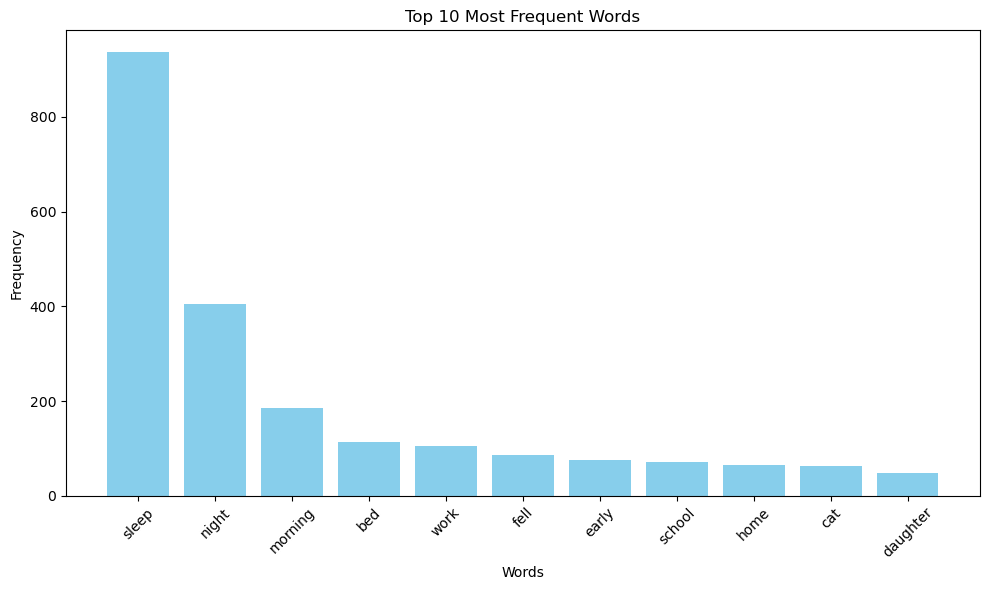

In [181]:
# plot the top 10 Most Frequent Words
plt.figure(figsize=(10, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of our dataset revealed the top 10 most frequently occurring words in narratives associated with 'sleep' as 'night', 'morning', 'bed', 'work', 'fell', 'early', 'school', 'home', 'cat', and 'daughter'. Notably, there is a significant degree of overlap between these frequently occurring words and the words identified by the Word2Vec model as being closely related to 'sleep'. This congruence is not just a coincidence but a validation of the patterns emerging in our dataset. It underscores the reliability of the findings and suggests that these words indeed key elements of the happy moments people associate with sleep. 

By analyzing how these keywords are used in narratives about happiness and sleep, we can summarize some topics: "Work-Life Balance", "Family and Relationships", "Companionship", "Sleep Environment", "Daily Commute and Routine", and "Physical Sensations and Actions".

These results collectively paint a comprehensive picture of the common themes in happy moments involving sleep. By analyzing both the frequency of these words and their contextual relevance through the Word2Vec model, we gain a deeper understanding of how sleep intertect with various facets of life to contribute to happiness.

So since sleep is brought up so many times, do people mention any specific measures to improve sleep? In this case, My third question is: Are there specific practices or habits mentioned that correlate with improved sleep and happiness?

### Question 3: Are there specific practices or habits mentioned that correlate with improved sleep and happiness?

To delve deeper into potential strategies for enhancing sleep quality, I created a word cloud based on the key words people used when mentioning sleep in the context of happy moments. I used the smae stop word to filter the meaningless information. This visual representation highlights the most prominent themes and elements associated with positive sleep experiences. There are some words emerged in this analysis, providing the clues into what might contribute to better sleep.

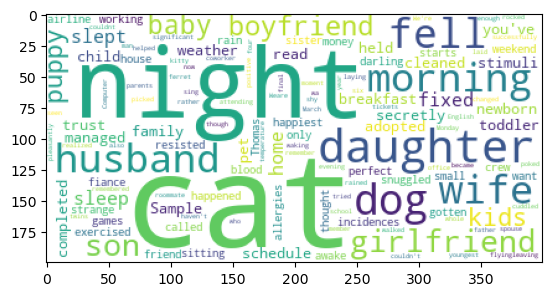

In [183]:
# split the sentence into words
text = " ".join(cat.split()[1] for cat in sleep_rows['cleaned_hm'])

# make word cloud
wc = WordCloud(background_color = "white", stopwords = stop_word).generate(text)
plt.imshow(wc)

Among these words, 'pets' like cats and dogs were prominent, suggesting the comforting and calming influence animals can have on sleep quality. Similarly, the frequent mentions of family members - including 'wife', 'husband', 'daughter', and 'son' - underscore the importance of close, supportive relationships in fostering a positive sleep environment.  Additionally, natural factors such as 'rain' were also highlighted, hinting at the soothing effect of certain environmental conditions. The sound of rain, for instance, is often associated with relaxation and a peaceful atmosphere, which can be conducive to falling asleep more easily and experiencing more restful sleep.

To translate these thematic insights into more concrete strategies for improving sleep quality, I decided to extract specific examples from our data.

In [193]:
# define the key word
word_to_search_cat = 'cat'

# search the rows cotains the key word "cat" and create the new data frame
cat_rows = sleep_rows[sleep_rows['cleaned_hm'].str.contains(word_to_search_cat, case = False, na =  False)]

#display several sample from new data frame
if 'cleaned_hm' in cat_rows.columns:

    random_rows = cat_rows['cleaned_hm'].sample(n = 3)
else:
    random_rows = "Column 'cleaned_hm' does not exist in the dataset."

# pd.set_option('display.max_colwidth', None)
random_rows

93335                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Talking with my daughter about how the cat sleeps in her bed.
41761                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [195]:
# define the key word
word_to_search_rain = 'rain'

# search the rows cotains the key word "rain" and create the new data frame
rain_rows = sleep_rows[sleep_rows['cleaned_hm'].str.contains(word_to_search_rain, case = False, na = False)]

#display several sample from new data frame
if 'cleaned_hm' in rain_rows.columns:

    random_rows_rain = rain_rows['cleaned_hm'].sample(n = 3)
else:
    random_rows_rain = "Column 'cleaned_hm' does not exist in the dataset."

# pd.set_option('display.max_colwidth', None)
random_rows_rain

27525                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          The rain sounded so nice last night, it helped me fall asleep.
88876                                                                                                                                                                                                                                                                                                                     

In [197]:
# define the key word
word_to_search_daughter = 'daughter'

# search the rows cotains the key word "daughter" and create the new data frame
daughter_rows = sleep_rows[sleep_rows['cleaned_hm'].str.contains(word_to_search_daughter, case = False, na = False)]

#display several sample from new data frame
if 'cleaned_hm' in daughter_rows.columns:

    random_rows_daughter = daughter_rows['cleaned_hm'].sample(n = 3)
else:
    random_rows_daughter = "Column 'cleaned_hm' does not exist in the dataset."

# pd.set_option('display.max_colwidth', None)
random_rows_daughter

64474                                   It made me happy when my daughter started sleeping through the night two months ago. 
91848                                                         I slept in bed with my daughter to get her to sleep last night.
90740    My daughter decided it was time for bed, and I got her to go to sleep easily and quickly, without her getting angry.
Name: cleaned_hm, dtype: object

These examples paints a clear and heartwarming picture: the presence of pets and loved ones, as well as the enjoyment of serene natural weather, play a significant role in enhancing people's happiness and sleep quality.      The soothing purr of a cat or the loyal warmth of a dog offers a sense of comfort that seems to ease the mind into a peaceful slumber.      Likewise, the family members provides an emotional sanctuary that fosters deep and restful sleep.      Furthermore, the natural elements, like the gentle patter of rain or a cool evening breeze, can also usher in a tranquility that nurtures both the spirit and the body's need for rest. They are integral to the very quality of our sleep and, by extension, our overall health and happiness.

### Conclusions

1. Quality of sleep is not just a matter of physical health, but it intertwines significantly with our emotional well-being.

2. By analyzing how these keywords are used in narratives about happiness and sleep, we can summarize some topics: "Work-Life Balance", "Family and Relationships", "Companionship", "Sleep Environment", "Daily Commute and Routine", and "Physical Sensations and Actions".

3. By looking at the word cloud and our random sampling examples, we can improve our sleep quality by spending time with family, pets, and other natural comforts.

--------------------------------------------------------------------------------------------------------------